In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_symbols(path): #func to read in the symbols from companies.txt
    with open(path,'r') as file: #open file
        return file.read().splitlines() #return array of company symbols

In [3]:
#get array of symbols
symbols_path = 'companies.txt'
symbols = read_symbols(symbols_path)
print(symbols)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALB', 'ALK', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', '

In [6]:
data = {} #dictionary to hold data
for symbol in symbols:
    data_path = f"company-data/{symbol}-data.csv" #path to company specific data
    try:
        df_ind = pd.read_csv(data_path)
        df_ind['target'] = df_ind['Close'].shift(-1) #create target variable (next days close variable)
        df_ind = df_ind.dropna() #drop NaN values
        print(f'{symbol}:\n')
        print(df_ind.shape)
        print('\n')
        data[symbol] = df_ind
    except:
        pass

MMM:

(5974, 26)


AOS:

(4682, 26)


ABT:

(5974, 26)


ABBV:

(2705, 26)


ACN:

(4712, 26)


ADM:

(6004, 26)


ADBE:

(6004, 26)


AAP:

(4712, 26)


AMD:

(6004, 26)


AES:

(6003, 26)


AFL:

(6002, 26)


A:

(6000, 26)


APD:

(6003, 26)


AKAM:

(4712, 26)


ALB:

(4712, 26)


ALK:

(4712, 26)


ARE:

(4712, 26)


ALGN:

(4712, 26)


ALLE:

(2504, 26)


LNT:

(4712, 26)


ALL:

(6001, 26)


GOOGL:

(4842, 26)


GOOG:

(2427, 26)


MO:

(6004, 26)


AMZN:

(6001, 26)


AMCR:

(1116, 26)


AEE:

(6001, 26)


AAL:

(2500, 26)


AEP:

(6004, 26)


AXP:

(6004, 26)


AIG:

(6004, 26)


AMT:

(4712, 26)


AWK:

(3919, 26)


AMP:

(4572, 26)


AME:

(4712, 26)


AMGN:

(6002, 26)


APH:

(4712, 26)


ADI:

(6002, 26)


ANSS:

(4712, 26)


AON:

(4712, 26)


APA:

(6002, 26)


AAPL:

(6006, 26)


AMAT:

(6002, 26)


APTV:

(3015, 26)


ANET:

(2378, 26)


AJG:

(4712, 26)


AIZ:

(4712, 26)


T:

(6006, 26)


ATO:

(4712, 26)


ADSK:

(6001, 26)


ADP:

(6002, 26)


AZO:

(6003, 26)




In [7]:
df = pd.concat(data.values(), ignore_index=True)
print(df.shape)
print(df.head(10))

(2354302, 26)
         Date     Open     High      Low    Close        Volume  \
0  2000-03-29  31.1995  31.1995  30.6183  30.7074  4.594542e+06   
1  2000-03-30  30.8634  32.1536  30.7074  31.1995  4.419489e+06   
2  2000-03-31  31.6586  32.2485  31.0396  31.0396  3.443945e+06   
3  2000-04-03  31.3332  32.3754  31.2828  32.1971  4.021207e+06   
4  2000-04-04  32.2485  33.4970  31.3767  32.5846  6.779498e+06   
5  2000-04-05  32.5555  33.2248  31.9134  31.9328  4.027360e+06   
6  2000-04-06  31.9976  33.2461  31.9976  32.7125  2.459723e+06   
7  2000-04-07  32.8045  33.3400  32.1119  32.1119  3.502765e+06   
8  2000-04-10  32.1971  33.2461  32.1536  32.5110  2.955758e+06   
9  2000-04-11  32.5110  34.0123  32.5110  33.4485  4.134358e+06   

   daily_returns  2_day_ma   3_day_ma  5_day_ma  ...  5_day_volatility  \
0      -0.014304  30.93020  30.973800  31.04858  ...          0.026645   
1       0.016025  30.95345  31.019967  31.19212  ...          0.027065   
2      -0.005125  31.11955

In [10]:
print(df.dtypes)

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
daily_returns        float64
2_day_ma             float64
3_day_ma             float64
5_day_ma             float64
7_day_ma             float64
10_day_ma            float64
20_day_ma            float64
30_day_ma            float64
2_day_volatility     float64
3_day_volatility     float64
5_day_volatility     float64
7_day_volatility     float64
10_day_volatility    float64
20_day_volatility    float64
30_day_volatility    float64
2_day_support        float64
2_day_resistance     float64
2_day_avg_volume     float64
2_day_stoch_k        float64
target               float64
dtype: object


In [11]:
X = df.drop(['target'], axis=1)  # Features: all columns except 'target'
y = df['target']  #target column

#split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.drop('Date', axis=1)
X_test = X_test.drop('Date', axis=1)


#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential([
    Dense(25, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(13, activation='relu'),
    Dense(1)  # Output layer for regression; no activation function
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train_scaled, y_train,
                    validation_split=0.1,
                    epochs=100,
                    batch_size=512,  # Start with a larger batch size
                    callbacks=[early_stopping, reduce_lr])


test_loss = model.evaluate(X_test_scaled, y_test)

predictions = model.predict(X_test_scaled)

2024-02-27 22:55:13.073749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/SeanBrady/opt/anaconda3/envs/pythonProjects/lib/python3.9/site-packages/keras/engine/data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/100
3311/3311 [==============================] - 3s 728us/step - loss: 3275.4084 - val_loss: 45.2168 - lr: 0.0010
Epoch 2/100
3311/3311 [==============================] - 2s 695us/step - loss: 40.1720 - val_loss: 34.0398 - lr: 0.0010
Epoch 3/100
3311/3311 [==============================] - 2s 692us/step - loss: 37.1311 - val_loss: 31.2308 - lr: 0.0010
Epoch 4/100
3311/3311 [==============================] - 2s 676us/step - loss: 34.8377 - val_loss: 34.2948 - lr: 0.0010
Epoch 5/100
3311/3311 [==============================] - 2s 669us/step - loss: 34.5702 - val_loss: 40.5224 - lr: 0.0010
Epoch 6/100
3311/3311 [==============================] - 2s 674us/step - loss: 32.0334 - val_loss: 32.9674 - lr: 0.0010
Epoch 7/100
3311/3311 [==============================] - 2s 671us/step - loss: 32.6788 - val_loss: 27.1974 - lr: 0.0010
Epoch 8/100
3311/3311 [==============================] - 2s 675us/step - loss: 32.1657 - val_loss: 33.6869 - lr: 0.0010
Epoch 9/100
3311/3311 [===============

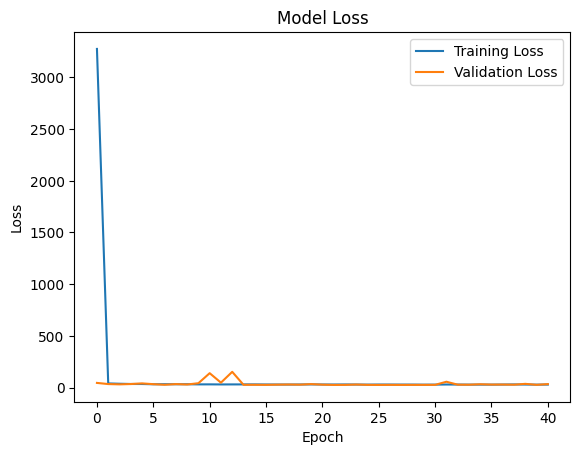

In [12]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

rmse = mean_squared_error(y_test, predictions, squared=False)  # squared=False returns RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1.1461029142959642
Mean Squared Error (MSE): 21.95719698395657
Root Mean Squared Error (RMSE): 4.685850721475938
R-squared (R²): 0.9994421947725585


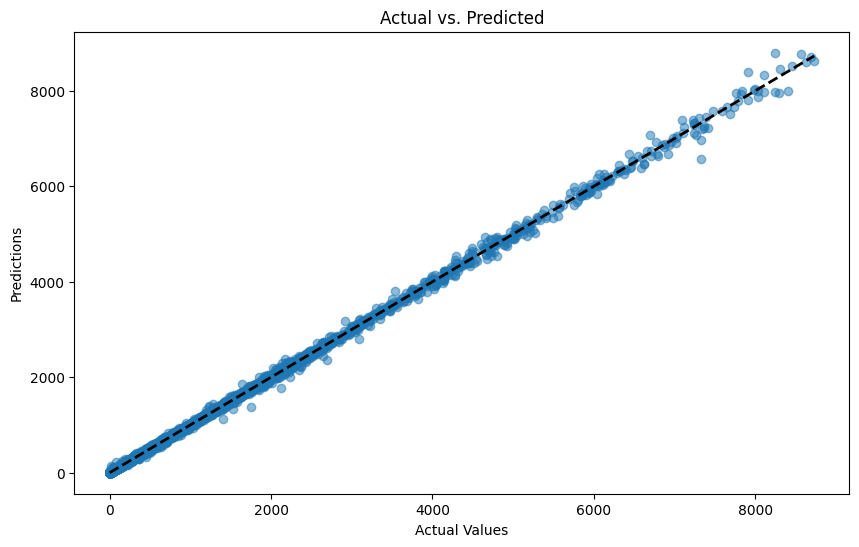

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title("Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [29]:
print(df.iloc[900000])

Date                     2015-12-29
Open                        136.389
High                        136.792
Low                         135.386
Close                        136.34
Volume               1155997.866998
daily_returns              0.005294
2_day_ma                    135.981
3_day_ma                 136.221667
5_day_ma                   136.3968
7_day_ma                 135.654571
10_day_ma                  135.6499
20_day_ma                 136.81055
30_day_ma                140.600933
2_day_volatility           0.009335
3_day_volatility           0.007431
5_day_volatility           0.012297
7_day_volatility           0.016948
10_day_volatility          0.017891
20_day_volatility          0.018218
30_day_volatility          0.016807
2_day_support               135.622
2_day_resistance             136.34
2_day_avg_volume     1565916.620878
2_day_stoch_k             81.611066
target                       136.28
Name: 900000, dtype: object


In [30]:
#manual_X = df.iloc[500000].drop('target','Date')  # Features: all columns except 'target'
manual_X = df.drop(['target', 'Date'], axis=1).iloc[900000]
manual_y = df.iloc[900000]['target']

manual_X_df = manual_X.to_frame().transpose()

# Assuming 'scaler' is your preprocessing scaler (e.g., StandardScaler instance)
manual_X_scaled = scaler.transform(manual_X_df)

predicted_output = model.predict(manual_X_scaled)
print(f"Predicted Output: {predicted_output[0]}")  # Assuming you're predicting a single value
print(manual_y)


1/1 [==============================] - 0s 10ms/step
Predicted Output: [137.62488]
136.28


In [ ]:
## train new model by training up till 12,31,22 and then test on all of 2023 data

